# Práctica 3: extracción de características
## Aguilar Alonso Adriana

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [12]:
file = 'winequalityN.csv'
df = pd.read_csv(path)
df.head()

,white,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
0,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
1,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
2,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [13]:
all_variables = ['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
type_variable = ['type']
df = pd.read_csv(file, names=all_variables)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.5
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.5
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5


In [15]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,56.718258,1.806374,12.980327,0.025761,-0.119119,-0.433566,-0.061162,-0.053858,0.061822,-0.002135,-0.005387,0.000530
1,11.848687,-19.902201,-3.900931,0.017383,-1.148799,-0.964766,-0.037372,0.029255,-0.049314,0.054135,-0.008719,0.000459
2,-18.288565,3.849472,2.187205,0.655199,0.375531,-0.263847,-0.072241,-0.010766,-0.156408,0.026925,-0.003162,-0.001409
3,72.225952,-0.176137,0.123381,0.405678,0.336213,-0.258126,0.003975,-0.080528,-0.090262,-0.030152,0.021492,0.000062
4,72.225952,-0.176137,0.123381,0.405678,0.336213,-0.258126,0.003975,-0.080528,-0.090262,-0.030152,0.021492,0.000062


In [16]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.53553364e-01, 4.06224475e-02, 4.82542054e-03, 4.94289672e-04,
       3.46421883e-04, 1.36393695e-04, 8.66354449e-06, 5.70146169e-06,
       4.14422886e-06, 2.93386689e-06, 2.19490993e-07, 1.60507634e-10])

In [18]:
df_pca['type'] = df[type_variable]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10','PC11','PC12','type']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,type
0,56.718258,1.806374,12.980327,0.025761,-0.119119,-0.433566,-0.061162,-0.053858,0.061822,-0.002135,-0.005387,0.000530,white
1,11.848687,-19.902201,-3.900931,0.017383,-1.148799,-0.964766,-0.037372,0.029255,-0.049314,0.054135,-0.008719,0.000459,white
2,-18.288565,3.849472,2.187205,0.655199,0.375531,-0.263847,-0.072241,-0.010766,-0.156408,0.026925,-0.003162,-0.001409,white
3,72.225952,-0.176137,0.123381,0.405678,0.336213,-0.258126,0.003975,-0.080528,-0.090262,-0.030152,0.021492,0.000062,white
4,72.225952,-0.176137,0.123381,0.405678,0.336213,-0.258126,0.003975,-0.080528,-0.090262,-0.030152,0.021492,0.000062,white


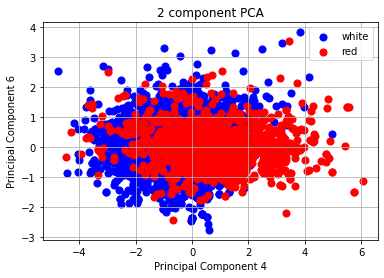

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 4') 
ax.set_ylabel('Principal Component 6') 
ax.set_title('2 component PCA') 
types = ['white', 'red']
colors = ['b', 'r']

for type_variable, color in zip(types,colors):
    indicesToKeep = df_pca['type'] == type_variable
    ax.scatter(df_pca.loc[indicesToKeep, 'PC4']
    , df_pca.loc[indicesToKeep, 'PC6']
    , c = color
    , s = 50)
ax.legend(types)
ax.grid()

## Kernel PCA (KPCA)

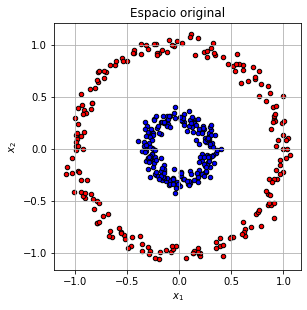

In [32]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

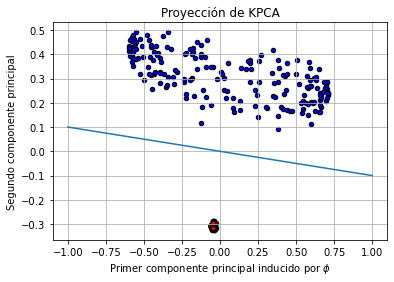

In [33]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()